# About
- **Author** : Cody Quist


- **Purpose** : Prediction of Close price of Tesla Stocks


- **Data Source** : [Yahoo Finance](https://finance.yahoo.com/quote/TSLA/history/)

- **Dependencies** : 
    - Chart Studio
    - Pandas
    - Numpy
    - Matplotlib
    - Sklearn


**Note : This notebook is created to fullfil requirment of the [machinelearningcourse](https://www.machinelearningcourse.io/courses/take/make-money/texts/7951539-homework-assignment-stock-prediction)  course offered by Siraj Raval**

# Result : Best Models for Close price prediction
**- Only Date as Input Feature**
    - Polynomial Regression with Degree=3
**- Open Price and Date as Input Feature**
    - Ridge Regression + Polynomial Regression with Degree=3


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go

#for online plotting
import chart_studio
import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='nubonix', api_key='thisHasBeenReplaced')

# CD to the project directory
import os

os.chdir(r'C:\Users\Nubonix\pyscripts3\siraj_homework\week2')


#for offline plotting
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True) 

# Data Cleaning

In [10]:
data = pd.read_csv('data/TSLA.csv') #reading stock prices
data.head() #checking out data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [11]:
data.info() #to check datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 7 columns):
Date         2314 non-null object
Open         2314 non-null float64
High         2314 non-null float64
Low          2314 non-null float64
Close        2314 non-null float64
Adj Close    2314 non-null float64
Volume       2314 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 117.6+ KB


In [12]:
#need to fix type of Date column
data['Date'] = pd.to_datetime(data['Date'])

- No Missing values
- No Duplicates

# Exploratly Data Analysis

In [13]:
print(f'Dataframe contains stock prices between {data.Date.min()} {data.Date.max()}') 
print(f'Total days={(data.Date.max()  - data.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-09-06 00:00:00
Total days=3356 days


In [14]:
data.describe() # to check for outliers

,Open,High,Low,Close,Adj Close,Volume
count,2314.000000,2314.000000,2314.000000,2314.000000,2314.000000,2.314000e+03
mean,178.831984,181.929144,175.543781,178.825895,178.825895,5.316261e+06
std,113.470628,115.216499,111.589545,113.474313,113.474313,4.668212e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.812501,34.417500,33.142500,33.795001,33.795001,1.747425e+06
50%,208.919998,212.709999,205.584999,208.319999,208.319999,4.387900e+06
75%,261.264992,264.690010,255.852497,261.032502,261.032502,7.131575e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


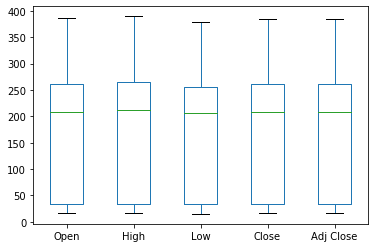

In [15]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box') #box plot to visually check for outliers

In [16]:
#plotly figure prepration
#setting a layout for figure. will be used later again. 
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#data to be plot
data_lst = [{'x':data['Date'], 'y':data['Close']}]
fig = go.Figure(data=data_lst, layout=layout)

In [17]:
py.iplot(fig) #plotting online

#iplot(fig) #plotting offline

# Regression for Stock Price Prediction

In [18]:
#For corss validation and hyper params selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [19]:
#spliting data into train and test sets
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
# For feature scaling
scaler = StandardScaler().fit(X_train)
#scaler.transform(...)

## 1. Simple Linear Regression (Without Scaling) 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#creating a linear model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig2 = go.Figure(data=data_lst, layout=layout)

In [24]:
py.iplot(fig2)

In [25]:
#calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg.predict(X_train))}\t{r2_score(Y_test, lreg.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lreg.predict(X_train))}\t{mse(Y_test, lreg.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8034019000253709	0.8029745142635155
MSE       2469.5562173128133	2658.135980467223



## 2. Simple Linear Regression (With Feature Scaling)

In [26]:
#feature scaling
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
#model training
lreg_scaled = LinearRegression()
lreg_scaled.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#calculating scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg_scaled.predict(X_train_scaled))}\t{r2_score(Y_test, lreg_scaled.predict(X_test_scaled))}
{'MSE'.ljust(10)}{mse(Y_train, lreg_scaled.predict(X_train_scaled))}\t{mse(Y_test, lreg_scaled.predict(X_test_scaled))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8034019000253709	0.8029745142635156
MSE       2469.5562173128133	2658.135980467223



## 3. Polynomial Regression (Degree=3)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
#feature prepration 
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [31]:
#model training
lreg3 = LinearRegression()
lreg3.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#calculating scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg3.predict(X_train_poly))}\t{r2_score(Y_test, lreg3.predict(X_test_poly))}
{'MSE'.ljust(10)}{mse(Y_train, lreg3.predict(X_train_poly))}\t{mse(Y_test, lreg3.predict(X_test_poly))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8710187572638602	0.87961587249086
MSE       1620.190784940815	1624.1420728544003



In [33]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg3.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)
py.iplot(fig3)

## 4. Ridge Regression + Polynomial Regression (with Date and Open Price as input features)

In [34]:
from sklearn.linear_model import Ridge

In [35]:
#spliting data into 
X = np.array([data.index, data['Open']]).T
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#transforming input features
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [36]:
#training model
clf = Ridge(alpha=0.1)
clf.fit(X_train_poly, Y_train) 

c:\users\nubonix\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=4.61962e-24): result may not be accurate.



Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
#calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, clf.predict(X_train_poly))}\t{r2_score(Y_test, clf.predict(X_test_poly))}
{'MSE'.ljust(10)}{mse(Y_train, clf.predict(X_train_poly))}\t{mse(Y_test, clf.predict(X_test_poly))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9979239900279169	0.9983228780268909
MSE       26.077685056075513	22.626607129983526



In [38]:
# plotting predicted and actual values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)
py.iplot(fig3)